In [2]:
# intall ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.3/719.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [ ]:
ls

datasetpothole/  data.yaml  runs/  yolov8.ipynb  yolov8s.pt


In [ ]:
#training
%cd /content/drive/MyDrive/yolov8
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=30 imgsz=224 plots=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=


Class: pothole, Box: [ 92  56 519 304]
0: 160x224 1 pothole, 66.4ms
Speed: 1.5ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 160, 224)


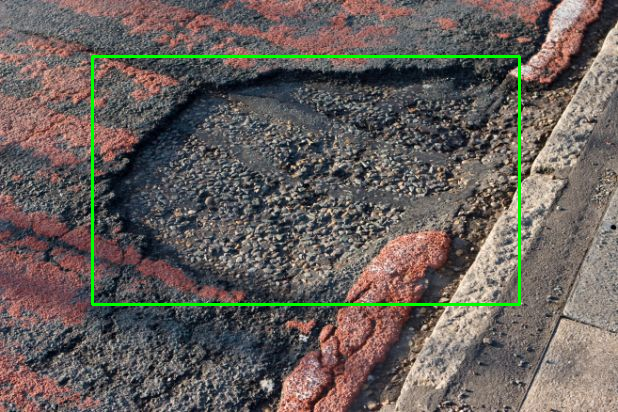

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/yolov8/runs/detect/train8/weights/best.pt')

img = cv2.imread('/content/drive/MyDrive/yolov8/datasetpothole/test/images/Pothole-054.jpg')
results = model.predict(img, stream=True)
path = "/content/drive/MyDrive/yolov8"

for result in results:
    boxes = result.boxes.cpu().numpy()
    for box in boxes:
        r = box.xyxy[0].astype(int)
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        print(f"Class: {class_name}, Box: {r}")
        cv2.rectangle(img, r[:2], r[2:], (0, 255, 0), 2)
        filename = str(6) + ".jpg"
        filename = os.path.join(path, filename)
        crop = img
        cv2.imwrite(filename, crop)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()